<a href="https://colab.research.google.com/github/edcalderin/DeepLearning_SaturdaysAI/blob/master/Tareas/Tarea_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea: Convolutional Neural Networks
### Grupo: Raquel, Erick y Alejandro.
Integrantes:
<br>
* Carrasco Céspedes Miguel Alejandro
* Calle Zapata Raquel Veranda
* Calderin Morales Erick David
<br>

Indicaciones:
<rb>
* Debe realizar la siguiente tarea hasta el miercoles 16 de junio, 23:59 UTC - 4
* Debe hacer una copia de este notebook para poder editar el código.
* Debe poner el código faltante en las celdas que correspondan.
* Una vez finalizado el trabajo debe subir el link de su notebook (con permisos de lector) en la sección de "Tareas" del Módulo 2: Convolutional Neural Networks en Eduflow.

La siguiente tarea tiene como finalidad reforzar el concepto de armado de una red neuronal convolucional. Se usará como base la arquitectura AlexNet aplicado al Fashion MNIST dataset.

In [ ]:
# Compilar para instalar d2l
!pip install d2l==0.16.5

# Armando la AlexNet 

### Sobre AlexNet
AlexNet fue diseñado principalmente por Alex Krizhevsky. Fue publicado con Ilya Sutskever y el asesor de doctorado de Krizhevsky, Geoffrey Hinton, y es una red neuronal convolucional o CNN.

Después de competir en el desafío de reconocimiento visual a gran escala de ImageNet, AlexNet saltó a la fama. Logró un error entre los 5 primeros del 15,3%. Esto fue un 10,8% más bajo que el del subcampeón.

El resultado principal del papel original fue que la profundidad del modelo era absolutamente necesaria para su alto rendimiento. Esto era bastante costoso computacionalmente, pero se hizo factible gracias a las GPU o unidades de procesamiento gráfico durante el entrenamiento.
<br>
[<b><i>Paper</i></b>](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

### Arquitectura AlexNet
AlexNet fue la primera red convolucional que utilizó GPU para aumentar el rendimiento.

1. La arquitectura AlexNet consta de 5 capas convolucionales, 3 capas de max pooling, 2 capas de normalización, 2 capas Fully-connected y 1 capa softmax.

2. Cada capa convolucional consta de filtros convolucionales y una función de activación no lineal ReLU.

3. El tamaño de entrada es fijo debido a la presencia de capas completamente conectadas.

4. El tamaño de entrada se menciona en la mayoría de los lugares como 224x224x3, pero debido al relleno que ocurre, resulta ser 227x227x3.

5. AlexNet en general tiene 60 millones de parámetros.

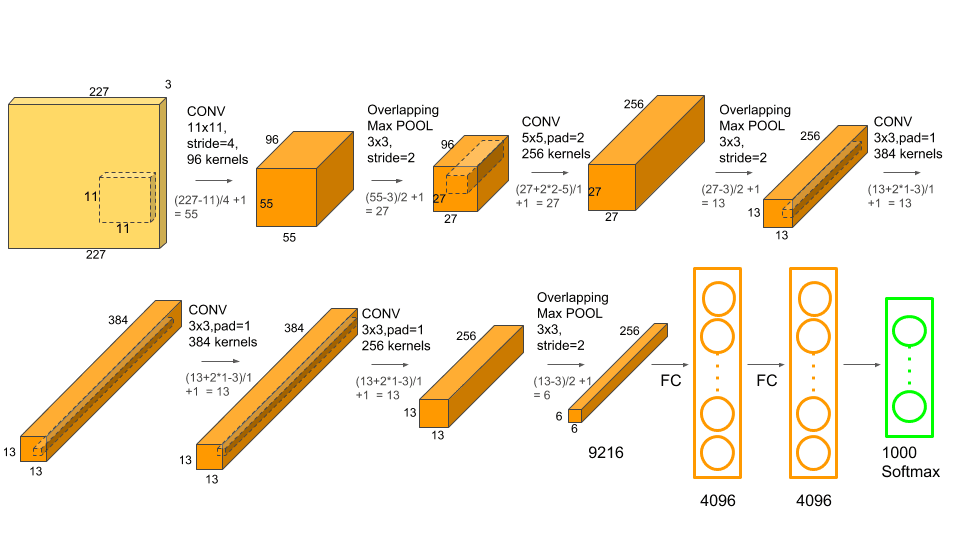

La misma arquitectura pero visualmente más simple se la describe en la siguiente imagen. Cabe recalcar que se lee la imagen de abajo para arriba.
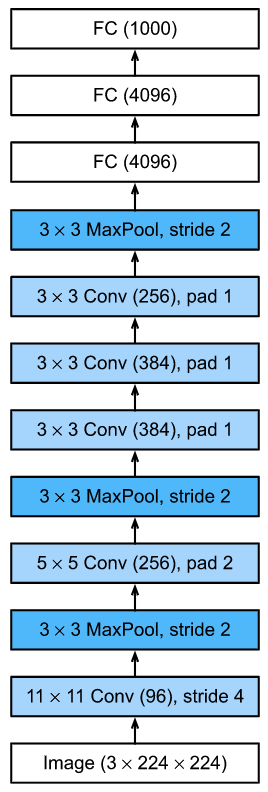

En nuestro ejercicio aplicaremos la CNN para resolver el problema de Fashion MNIST, recordar que e ImageNet tenemos 1000 clases y por eso al final de la arquitectura se menciona "FC(1000)". En Fashion MNIST tenemos menos clases.
<br>
Tomar en cuenta:
<br>
* Poner dropout de 0.5 después de cada cada Dense.
* No poner dropout después de la capa de salida
<br>

Pistas:
* [Capa Conv2D en keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
* [Capa MaxPool2D en keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
* [Capa Dense en keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
* [Dropout en keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

def net():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96,kernel_size=(11,11),strides=4, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same', activation='relu'),
        tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same', activation='relu'),
        tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
      ])

In [ ]:
# NET 2
import tensorflow as tf
from d2l import tensorflow as d2l

def net2():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=96,kernel_size=(11,11), strides=4, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
      ])

El siguiente código al ser compilado deberia mostrar un resumen de la arquitectura. Si da error es porque algo anda mal en la arquitectura.


In [ ]:
X = tf.random.uniform((1, 224, 224, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, ', tiene shape:\t', X.shape)

Conv2D , tiene shape:	 (1, 54, 54, 96)
MaxPooling2D , tiene shape:	 (1, 26, 26, 96)
Conv2D , tiene shape:	 (1, 26, 26, 256)
MaxPooling2D , tiene shape:	 (1, 12, 12, 256)
Conv2D , tiene shape:	 (1, 12, 12, 384)
Conv2D , tiene shape:	 (1, 12, 12, 384)
Conv2D , tiene shape:	 (1, 12, 12, 256)
MaxPooling2D , tiene shape:	 (1, 5, 5, 256)
Flatten , tiene shape:	 (1, 6400)
Dense , tiene shape:	 (1, 4096)
Dropout , tiene shape:	 (1, 4096)
Dense , tiene shape:	 (1, 4096)
Dropout , tiene shape:	 (1, 4096)
Dense , tiene shape:	 (1, 10)


### Obteniendo los datos
En la siguiente celda de código definir el batch size a 128.


In [ ]:
batch_size = 256
entrenamiento, testeo = d2l.load_data_fashion_mnist(batch_size, resize=224)

Train <tensorflow.python.data.ops.dataset_ops.Options object at 0x7f6866639cd0>


## Entrenamiento de la Alexnet
* Definir primero el learning rate (lr) con 0.04
* Hace 15 epochs

<br>
Al compilar el código de la siguiente le aparecerá el accuracy una gráfica del loss de entrenamiento, y el accuracy en el entrenamiento y testeo.



loss 0.182, train acc 0.931, test acc 0.914
1559.7 examples/sec on /GPU:0


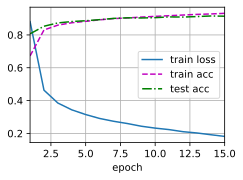

In [ ]:
lr = 0.04
num_epochs = 15
d2l.train_ch6(net, entrenamiento, testeo, num_epochs, lr, d2l.try_gpu())

## Responder las siguientes preguntas:
**¿Cómo intepreta la gráfica final?**
<br>
R.- La gráfica muestra la evolución de la función de pérdida y accuracy en el conjunto de entramiento y testeo. Se puede distinguir un descenso esperado del Loss function y un incremento en los valores test y train, al inicio del entrenamiento se ve un desfase entre éstas dos, entre 5 y aproximadamente 8 epochs se considera el umbral ideal, mas adelante se nota un poco el sobreajuste al ver que la curva de test esta por debajo de la de entrenamiento.

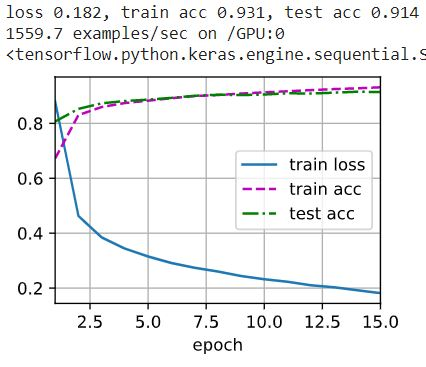

**¿Qué pasa con el accuracy si el batch size lo cambia a 256?**
<br>
R.- El accuracy disminuye levemente para train y test.

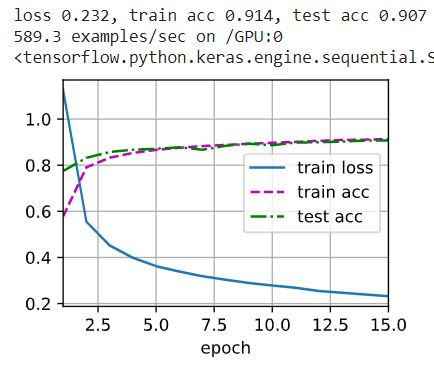

**¿Qué pasa con el accuracy si a la arquitectura de AlexNet le borra dos convoluciones?**
<br>
R.-
Al borrar las últimas dos convoluciones El accuracy varía levemente pero no se pueden apreciar cambios bruscos o notables.
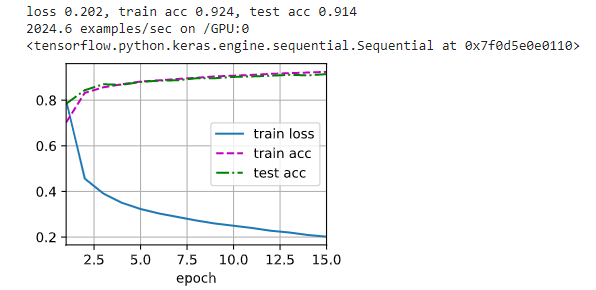

**¿Qué pasa con el accuracy si el learning rate es 0.001?**
<br>
R.- Disminuye ya que los saltos son mas pequeños, quizá haya sido por minímos locales detectados.

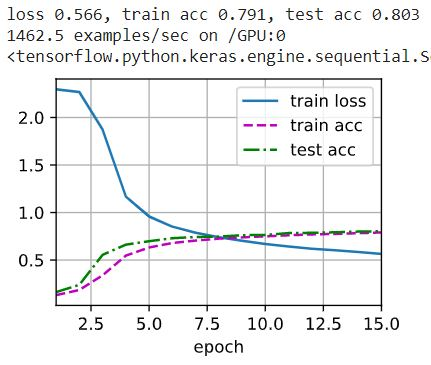


**¿Qué pasa con el accuracy si el learning rate es 0.8?**
<br>
R.- El accuracy en test y train es constante durante todas las épocas

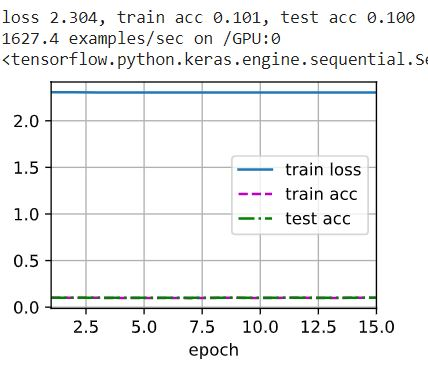


**¿Qué pasa con el accuracy si a la arquitectura de AlexNet le borra los dropout?¿Por qué?**
<br>
R.-

Al principio aparentemente no existe diferencia ero luego se puede apreciar como el valor de train accuracy salta por encima de de test accuracy, siendo claro síntoma de overfitting.

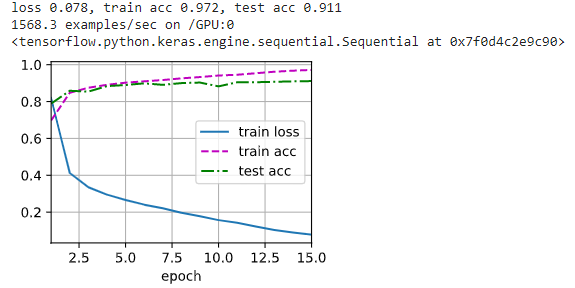